In [17]:
# Descarga de datos
#
import pandas as pd


owner = "jdvelasq"
repo = "datalabs"
file = "datasets/demanda_comercial.csv"

file_url = f"https://raw.githubusercontent.com/{owner}/{repo}/master/{file}"


data = pd.read_csv(file_url, sep=";", decimal=",", thousands=".")
data.head()


,Fecha,H01,H02,H03,H04,H05,H06,H07,H08,H09,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2017-01-01,6090271.96,5887031.28,5708693.89,5538133.02,5389774.53,5288199.94,4851217.85,4876162.18,5073813.27,...,5745568.87,5647807.40,5609297.84,5690105.56,6761038.26,7077861.59,6979468.90,6695312.12,6289107.72,5794545.98
1,2017-01-02,5557603.42,5361012.17,5239119.86,5163721.70,5249539.75,5438852.95,5566947.57,6055220.80,6588005.66,...,7610559.73,7584026.97,7421194.49,7317194.26,8182697.67,8482127.69,8251009.75,7836278.95,7221234.85,6660691.64
2,2017-01-03,6160676.02,5924880.04,5764416.93,5685832.28,5778222.13,5985840.29,6083907.36,6545100.21,7092804.54,...,8148614.93,8117168.00,7930900.03,7783762.28,8653467.38,8835882.88,8562448.23,8095841.79,7443299.51,6840297.15
3,2017-01-04,6321851.20,6092135.24,5905390.85,5827867.82,5925730.02,6182279.89,6276759.96,6737660.53,7256819.19,...,8164513.51,8132006.92,7962749.39,7841533.59,8700506.07,8860255.66,8611085.76,8147451.75,7471240.82,6838250.32
4,2017-01-05,6395397.96,6162409.22,6001153.67,5918673.26,6005924.21,6225027.53,6322923.78,6739120.44,7307847.42,...,8144209.65,8136193.07,8022918.36,7927405.07,8718181.89,8832234.87,8579992.47,8063978.64,7406615.66,6829864.57


In [18]:
# Se organizan los datos para graficarlos.
#
data_to_plot = data.copy()
data_to_plot = data_to_plot.melt(
    id_vars=["Fecha"], var_name="hora", value_name="demanda"
)
data_to_plot = data_to_plot.sort_values(by=["Fecha", "hora"])
data_to_plot = data_to_plot.reset_index(drop=True)
data_to_plot = data_to_plot.head(500)
data_to_plot.head()

,Fecha,hora,demanda
0,2017-01-01,H01,6090271.96
1,2017-01-01,H02,5887031.28
2,2017-01-01,H03,5708693.89
3,2017-01-01,H04,5538133.02
4,2017-01-01,H05,5389774.53


In [19]:
# Crea una carpeta de salida
#
import os

if not os.path.exists("../files/plots"):
    os.makedirs("../files/plots")

if not os.path.exists("../files/data"):
    os.makedirs("../files/data")

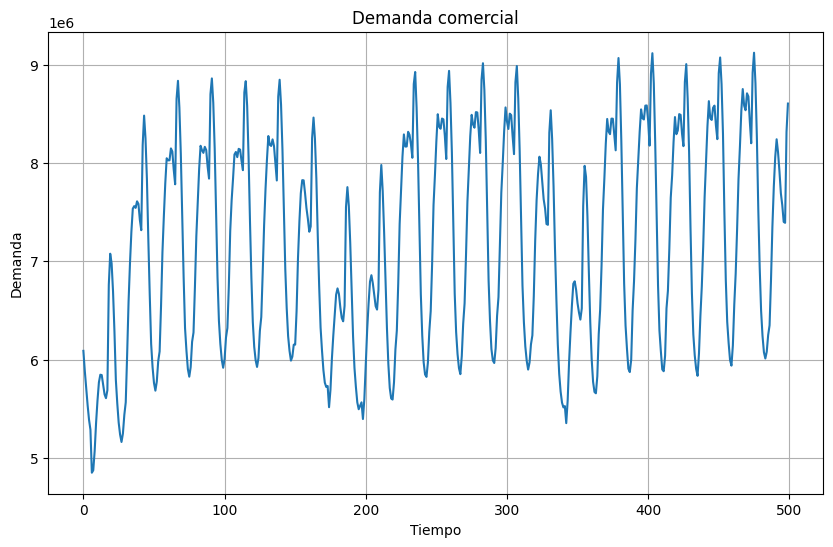

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_to_plot["demanda"])
plt.title("Demanda comercial")
plt.xlabel("Tiempo")
plt.ylabel("Demanda")
plt.grid()
plt.savefig("../files/plots/demanda-comercial.png")
plt.show()

In [21]:
# Preparación de la data
#
data = data.dropna()
data = data.drop_duplicates()
data = data.set_index("Fecha")

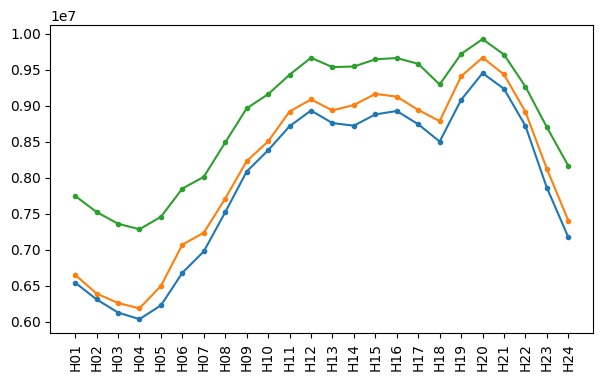

In [22]:
# Patrones de ejemplo
#
plt.figure(figsize=(7, 4))
plt.plot(data.loc["2017-06-05", :], ".-", color="tab:blue")
plt.plot(data.loc["2018-06-05", :], ".-", color="tab:orange")
plt.plot(data.loc["2022-06-03", :], ".-", color="tab:green")
plt.xticks(rotation=90)
plt.show()


In [23]:
import datetime


for date_str in ["2017-06-05", "2018-06-05", "2022-06-05"]:
    date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    day_of_week = date_obj.strftime("%A")

    print(date_str, day_of_week)

2017-06-05 Monday
2018-06-05 Tuesday
2022-06-05 Sunday


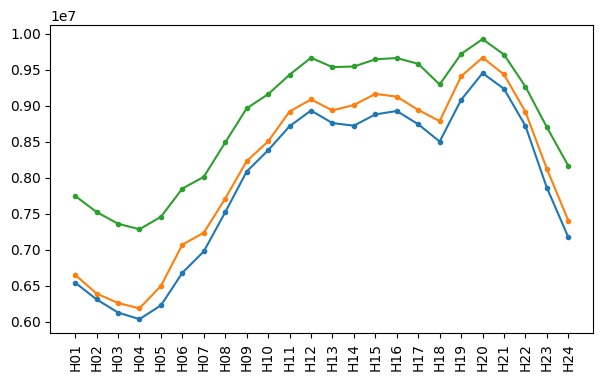

In [24]:
# Patrones de ejemplo
#
plt.figure(figsize=(7, 4))
plt.plot(data.loc["2017-06-05", :], ".-", color="tab:blue")
plt.plot(data.loc["2018-06-05", :], ".-", color="tab:orange")
plt.plot(data.loc["2022-06-03", :], ".-", color="tab:green")
plt.xticks(rotation=90)
plt.show()


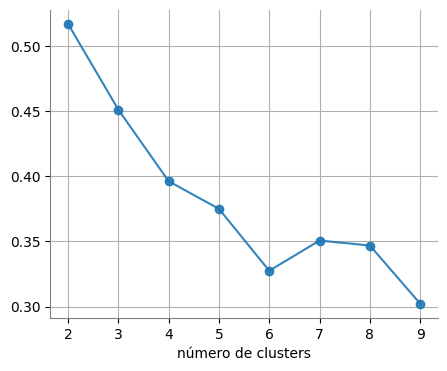

In [25]:
# Determinación de la cantidad de perfiles diferentes
#
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 10
scores = []

for n in range(2, n_clusters):

    kmeans = KMeans(n_clusters=n, n_init="auto")
    kmeans.fit(data)
    labels = kmeans.labels_
    scores.append(silhouette_score(data, labels, metric="euclidean"))


plt.figure(figsize=(5, 4))
plt.plot(range(2, n_clusters), scores, marker="o", color="tab:blue", alpha=0.9)
plt.xlabel("número de clusters")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()

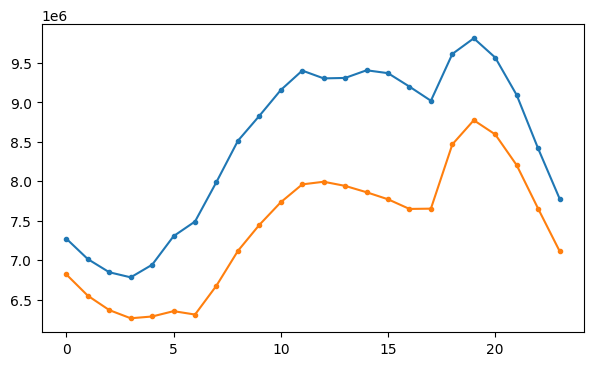

In [26]:
# Dos patrones óptimos
#
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(data)

plt.figure(figsize=(7, 4))
plt.plot(kmeans.cluster_centers_[0], ".-", color="tab:blue")
plt.plot(kmeans.cluster_centers_[1], ".-", color="tab:orange")
plt.savefig("../files/plots/demanda-comercial-perfiles.png")
plt.show()


In [27]:
#
# Adiciona el numero del cluster correspondiente a cada fila
# y agrega el día de la semana (como entero). El domingo
# es el día 0.
#
data = data.assign(cluster=kmeans.labels_)
data = data.assign(day=pd.to_datetime(data.index).day_of_week)
data[["cluster", "day"]]

,cluster,day
Fecha,,
2017-01-01,1,6
2017-01-02,1,0
2017-01-03,1,1
2017-01-04,1,2
2017-01-05,1,3
...,...,...
2022-08-27,0,5
2022-08-28,1,6
2022-08-29,0,0


In [28]:
# Calcula la frecuencia de cada día por cluster
#
data_per_cluster_0 = data.loc[data.cluster == 0, "day"]
days_cluster_0 = data_per_cluster_0.value_counts()
days_cluster_0 = days_cluster_0.sort_index()
days_cluster_0

day
0    207
1    257
2    254
3    257
4    259
5    167
6     13
Name: count, dtype: int64

In [29]:
data_per_cluster_1 = data.loc[data.cluster == 1, "day"]
days_cluster_1 = data_per_cluster_1.value_counts()
days_cluster_1 = days_cluster_1.sort_index()
days_cluster_1

day
0     89
1     39
2     42
3     38
4     36
5    128
6    283
Name: count, dtype: int64

In [30]:
#
# Salta el resultado
#
pd.DataFrame(
    {
        "days": list(range(7)),
        "cluster 0": days_cluster_0,
        "cluster 1": days_cluster_1,
    }
).to_csv("../files/data/demanda-comercial-dias.csv")